# **DIVE INTO CODE COURSE**
## **Sprint Machine Learning Scratch Decision Tree**
**Student**: Doan Anh Tien<br>
**ID**: 1852789<br>
**Email**: tien.doan.g0pr0@hcmut.edu.vn

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

---

### **[Problem 1] Function for finding impureness**

In a simple explaination, Gini impureness is a summation of all probability for each class's occurence in a node.

For example, there is a small scenario that there are sample of pictures having a shape looks like cat-ear, and there are 10 samples of them are regconzied as cat, while there are 8 samples of them are regconized as non-cat. These add up to the total of 18 pictures.

If we considered these statements as **Yes** and **No**, we can draw out a general view of their probability and calculate the Gini impureness as follows:

> $I(t) = 1 - ((\frac{10}{10+8})^2 + (\frac{8}{10+8})^2)$ = 0.494 (rounded)




In [ ]:
### Temporary Gini impureness function

def gini_impureness(X):
  """
  Find the Gini impureness value of a node

  Parameters
  ----------
  X: The following form of ndarray, shape (n_class,)
      Containing class values of the dataset

  Returns
  ----------
  gini_imp: float value
      The gini impureness of a node

  """
  
  n = len(X)
  total_impurity = 0
  x_class = np.unique(X[:,-1])
  
  for class_val in x_class: # Since the class are unique, using in range is fine
    total_impurity += ((X==class_val).sum()/n)**2
                       
  gini_imp = 1 - total_impurity

  return gini_imp

**Testing with data 1**

In [ ]:
## Testing with data 1
class_1 = np.full(15, 1)
temp_1 = np.column_stack((np.random.randn(15), class_1))
class_2 = np.full(15, 2)
temp_2 = np.column_stack((np.random.randn(15), class_2))

test_1 = np.concatenate((temp_1, temp_2))
np.random.shuffle(test_1)
test_1[0:10]

array([[ 0.94863594,  2.        ],
       [ 0.10375229,  2.        ],
       [ 1.39391325,  1.        ],
       [ 0.14415275,  2.        ],
       [-2.99165178,  2.        ],
       [ 1.0243018 ,  2.        ],
       [-0.84818483,  1.        ],
       [ 2.07033244,  2.        ],
       [-0.12574555,  1.        ],
       [-0.57820419,  1.        ]])

In [ ]:
print("The gini impureness for test_1: {}".format(gini_impureness(test_1)))

The gini impureness for test_1: 0.5


**Testing with data 2**

In [ ]:
## Testing with data 2
class_1 = np.full(15, 1)
temp_1 = np.column_stack((np.random.randn(15), class_1))
class_2 = np.full(15, 2)
temp_2 = np.column_stack((np.random.randn(15), class_2))
class_3 = np.full(15, 3)
temp_3 = np.column_stack((np.random.randn(15), class_3))

test_2 = np.concatenate((temp_1, temp_2, temp_3))
np.random.shuffle(test_2)
test_2[0:10]

array([[ 1.71277254,  3.        ],
       [ 1.06317301,  2.        ],
       [-0.11301578,  1.        ],
       [-0.58153774,  1.        ],
       [-0.36134731,  2.        ],
       [ 1.72541383,  3.        ],
       [ 0.46629637,  3.        ],
       [ 1.1408384 ,  1.        ],
       [ 0.80742453,  2.        ],
       [-1.44616228,  1.        ]])

In [ ]:
print("The gini impureness for test_2: {}".format(gini_impureness(test_2)))

The gini impureness for test_2: 0.6666666666666667


**Testing with data 3**

In [ ]:
## Testing with data 3
class_1 = np.full(18, 1)
temp_1 = np.column_stack((np.random.randn(18), class_1))
class_2 = np.full(12, 2)
temp_2 = np.column_stack((np.random.randn(12), class_2))

test_3 = np.concatenate((temp_1, temp_2))
np.random.shuffle(test_3)
test_3[0:10]

array([[ 0.72062056,  2.        ],
       [ 1.62322217,  1.        ],
       [ 0.64518932,  1.        ],
       [ 2.5661779 ,  2.        ],
       [ 1.72235409,  1.        ],
       [-0.95374546,  1.        ],
       [ 1.34964578,  1.        ],
       [-0.81700957,  2.        ],
       [ 0.60043611,  2.        ],
       [-1.91429246,  1.        ]])

In [ ]:
print("The gini impureness for test_3: {}".format(gini_impureness(test_3)))

The gini impureness for test_3: 0.48


**Testing with data 4**

In [ ]:
## Testing with data 4
class_1 = np.full(18, 1)
temp_1 = np.column_stack((np.random.randn(18), class_1))
class_2 = np.full(0, 2)
temp_2 = np.column_stack((np.random.randn(0), class_2))

test_4 = np.concatenate((temp_1, temp_2))
np.random.shuffle(test_4)
test_4[0:10]

array([[-0.10321731,  1.        ],
       [-0.21477782,  1.        ],
       [-0.92571644,  1.        ],
       [-0.63337241,  1.        ],
       [-1.36885913,  1.        ],
       [ 1.62823199,  1.        ],
       [ 1.73023872,  1.        ],
       [ 1.41480589,  1.        ],
       [-1.66743747,  1.        ],
       [-0.45136326,  1.        ]])

In [ ]:
print("The gini impureness for test_4: {}".format(gini_impureness(test_4)))

The gini impureness for test_4: 0.0


### **[Problem 2] Function for finding information gain**

In [ ]:
def information_gain(parent, left, right):
  """
  Find the Information gain obtained from nodes

  Parameters
  ----------
  parent: The following form of ndarray, shape (n_class,)
      Containing class values of the parent node
  
  left: The following form of ndarray, shape (n_class,)
      Containing class values of the left node

  right: The following form of ndarray, shape (n_class,)
      Containing class values of the right node

  Returns
  ----------
  info_gain: float value
      The information gain of a parent node

  """

  left_sample = float(len(left)/(len(left) + len(right)))
  right_sample = 1 - left_sample
  print("Left node proportion: {}".format(left_sample))
  print("Right node proportion: {}".format(right_sample))
  
  info_gain = parent - left_sample*gini_impureness(left) - right_sample*gini_impureness(right)

  return info_gain

**Testing with data 5**

In [ ]:
## Testing with data 5
label_1 = np.full(30,int(1))
parent_1 = np.column_stack((np.random.randn(30), label_1))
label_2 = np.full(35,int(2))
parent_2 = np.column_stack((np.random.randn(35), label_2))

parent_node = np.concatenate((parent_1, parent_2))
np.random.shuffle(parent_node)

In [ ]:
def node_splitting(parent_node):

  split = np.array_split(parent_node, 2)
  left_node = split[0]
  right_node = split[1]

  left_unique = np.unique(left_node[:,-1], return_counts=True)
  right_unique = np.unique(right_node[:,-1], return_counts=True)

  print("Left node:\n{}\nSamples of Class 1 - Class 2: {}".format(left_node[:,-1], left_unique[1]))
  print("\n")
  print("Right node:\n{}\nSamples of Class 1 - Class 2: {}".format(right_node[:,-1], right_unique[1]))

  return left_node, right_node

In [ ]:
left_node, right_node = node_splitting(parent_node)

Left node:
[1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1.
 2. 1. 1. 2. 1. 2. 1. 1. 1.]
Samples of Class 1 - Class 2: [21 12]


Right node:
[2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1.
 2. 2. 2. 2. 1. 1. 2. 2.]
Samples of Class 1 - Class 2: [ 9 23]


In [ ]:
print("The gini impureness for parent_node: {:.4f}".format(gini_impureness(parent_node)))
print("The gini impureness for left_node: {:.4f}".format(gini_impureness(left_node)))
print("The gini impureness for right_node: {:.4f}".format(gini_impureness(right_node)))
print("The information gain for this test: {:.4f}".format(information_gain(gini_impureness(parent_node), left_node, right_node)))

The gini impureness for parent_node: 0.4970
The gini impureness for left_node: 0.4628
The gini impureness for right_node: 0.4043
Left node proportion: 0.5076923076923077
Right node proportion: 0.49230769230769234
The information gain for this test: 0.0630


**Verification of tested data**

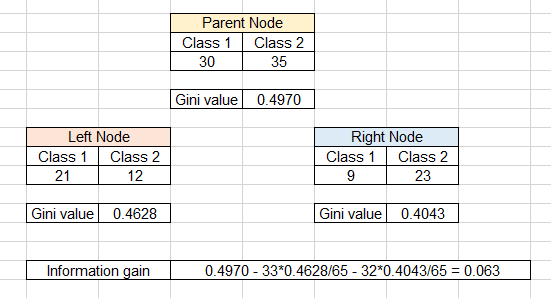

### **[Problem 3] Learning - [Problem 4] Estimate**

**Data Preparation**

In [ ]:
# Artificial dataset 2 from Sprint 1

X_set3 = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y_set3 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [ ]:
from sklearn.model_selection import train_test_split
X_set3_train, X_set3_val, y_set3_train, y_set3_val = train_test_split(X_set3, y_set3, train_size=0.8)
print("Train dataset -- Rows: {}, Columns: {}".format(X_set3_train.shape[0], X_set3_train.shape[1]))
print("Test dataset -- Rows: {}, Columns: {}".format(X_set3_val.shape[0], X_set3_val.shape[1]))

Train dataset -- Rows: 32, Columns: 2
Test dataset -- Rows: 8, Columns: 2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_set3_train = sc.fit_transform(X_set3_train)
X_set3_val = sc.fit_transform(X_set3_val)

**The meaning of finding best gain**

As we all know that, Information Gain can be calculated as the substraction between the gini impurity value of the original dataset and the summation of all child node's gini impurity value multiply with their own observation proportion (details in the following formula)

**$IG(p) = I(p) - (\frac{N_{left}}{N_{all}} \times I(left) + \frac{N_{right}}{N_{all}} \times I(right))$**


Why we want to achieve this Information Gain? 


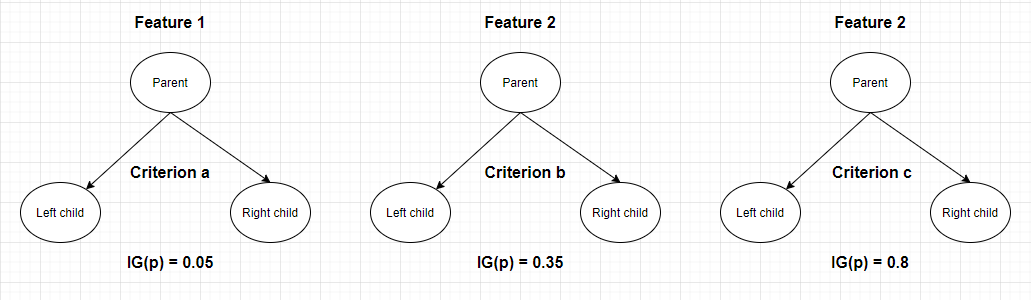

The more of impureness of a node, the less accuracy of its classification if it is the leaf node of a Decision Tree. From that, we would want to minimize this impureness as much as posible. And if the impureness value of each node is minimized, the information will be decrease accordingly. This can be done in step by step:

1. Selecting the value of each features as threshold for branch division
2. By evaluating all possible division, we can get the information gain among each iteration
3. Get the best information gain for each node, thus we also get the fitted criterion at that node
4. After getting the criterion, start splitting the dataset into two branches according to it
5. The current node will be the parent, and it will grows two child node to form a tree

From the figure below, the third tree seems to be the best division with it highest information gain.

**Decision Tree Node**

In [ ]:
class DTNode:
  """
  A node storing the feature values, the criterion
  for splitting and (maybe) its two child nodes
  """
  
  def __init__(self, threshold=None,
            left=None,
            right=None):
    
    self.criterion = threshold
    self.left_br = left
    self.right_br = right

**Decision Tree Leaf**

In [ ]:
class DTLeaf:
    """
    An end node that store the occurence of classes as dictionary
    when traverse from the dataset to the leaf node

    """
    
    def __init__(self, dataset):
      
      occurence = {}
      
      for sample in dataset:
          label = sample[-1]

          if label not in occurence:
              occurence[label] = 0
          
          occurence[label] += 1
      
      self.y_pred = list(occurence.keys())

**Criterion Class**

In [ ]:
class Criterion:
    """
    A Criterion is used to split a dataset into two branches.
    """

    def __init__(self, feature, feature_idx, sample):
        """
        Parameters
        ----------
        feature: The list of features of dataset

        feature_idx: The column index of the feature
       
        sample: The local value of the feature that set as a threshold

        """
        self.feature = feature
        self.feature_idx = feature_idx
        self.sample = sample

    def meet(self, input_sample):
        """
        A function that compare the input feature value with
        the feature value residing in the criterion of a node

        Parameters
        ----------
        input_sample: The input value to compare with the local feature value

        feature_idx: The column index of the feature
        
        """
        sample_val = input_sample[self.feature_idx]

        return sample_val >= self.sample # Boolean

    def __repr__(self):
        """
        Print the criterion of the current node
        """

        operator = ">="

        return "The value %s %s %s?" % (self.feature[self.feature_idx], operator, str(self.sample))

**Scratch Decision Tree**

In [ ]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.fit_tree = None # The final tree after being trained


    def fit(self, X, y, features):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Values of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data

        features: The form of list (length = n_features) 
            Containing the features of dataset 

        """
        # Condition to to check the need of concatenation in recursion branch (since the dataset is splitted into smaller partition)
        if (len(y) == len(X)):
            # Get the data with the label at the last column to be our original dataset
            data = np.column_stack((X, y))
        else:
            data = X
  
        # Get the features
        best_gain, best_criterion = self._find_best_gain(features, data)

        # If reach the leaf, return it
        if best_gain == 0:
            return DTLeaf(data)

        # Get the data subset for left and right node
        left_node, right_node = self._split_tree(data, best_criterion)
        
        # Recursion to grow the tree
        left_branch = self.fit(np.array(left_node), y, features)
        right_branch = self.fit(np.array(right_node), y, features)

        # Set this node as the root node
        fit_node = DTNode(best_criterion, left_branch, right_branch)
        self.fit_tree = fit_node

        if self.verbose == True:
            print(" " + str(fit_node.criterion))
            print(data)
            

        return fit_node # For recursion


    def predict(self, X):
        """
        Estimate the label using a decision tree classifier

        Parameters
        ----------
        X: The following form of ndarray, shape (n_sample, n_feature)
            Containing class values of the dataset

        Returns
        ----------
        predictions: The following form of ndarray, shape (n_sample,)
            The predictions stored at leaf node

        """

        predictions = []

        for sample in X:
            predictions.append(self._decision_branching(self.fit_tree, sample))
            
        return np.array(predictions)


    def _gini_impureness(self, X):
        """
        Find the Gini impureness value of a node

        Parameters
        ----------
        X: The following form of ndarray, shape (n_class,)
            Containing class values of the dataset

        Returns
        ----------
        gini_imp: float value
            The gini impureness of a node

        """
        
        n = len(X)
        total_impurity = 0
        x_class = np.unique(X[:,-1])
        
        # Calculate the impurity in a node by interpreting each class
        for class_val in x_class: 
          total_impurity += ((X==class_val).sum()/n)**2
                            
        gini_imp = 1 - total_impurity

        return gini_imp


    def _information_gain(self, parent, left, right):
        """
        Find the Information gain obtained from nodes

        Parameters
        ----------
        parent: The following form of ndarray, shape (n_class,)
            Containing class values of the parent node
        
        left: The following form of ndarray, shape (n_class,)
            Containing class values of the left node

        right: The following form of ndarray, shape (n_class,)
            Containing class values of the right node

        Returns
        ----------
        info_gain: float value
            The information gain of a parent node

        """
        # Calculate the proportion for both nodes
        left_sample = float(len(left)/(len(left) + len(right)))
        right_sample = 1 - left_sample

        # Information gain formula
        info_gain = parent - left_sample*self._gini_impureness(left) - right_sample*self._gini_impureness(right)

        return info_gain

        


    def _find_best_gain(self, features, X):
        """
        Function that traverse all of the samples of each feature to find the best information gain

        -> Take all values of all features and feed it into the threshold checker (class Criterion)
        -> Start plitting into two branches and calculate the information gain
        -> Find out the best information gain, and it will also reveal the best criterion

        Parameters
        ----------
        features: The list contain seperate features from the dataset (length = n_features)

        X: The form of ndarray (n_sample, n_features)
            The dataset that will be used to compare with the criterion (threshold)


        Returns
        ----------
        best_gain: float
            The best information gain achieved in this node

        best_criterion: An instance of class Criterion
            The best criterion for splitting the tree

        """

        best_gain = 0
        best_criterion = None


        parent_gini = self._gini_impureness(X)
        num_features = len(X[0])

        for feature_index in range(num_features - 1):
            
            # Get all unique value of all features from the numerical dataset
            value_feature = set([sample[feature_index] for sample in X])

            for value_feature_each in value_feature:
                # Get the criterion in this division
                criterion = Criterion(features, feature_index, value_feature_each)
                
                # Split into two subset based on the criterion
                left_data, right_data = self._split_tree(X, criterion)

                # If there is no data on either side, skip this iteration of division (unequality)
                if len(left_data) == 0 or len(right_data) == 0:
                    continue

                # Get the information gain
                info_gain = self._information_gain(parent_gini, np.array(left_data), np.array(right_data))

                # If there is a higher information gain, take this division as the righteous one
                if info_gain >= best_gain:
                    best_gain, best_criterion = info_gain, criterion

        return best_gain, best_criterion


    def _split_tree(self, X, criterion):
        """
        Function that split a node of data into two subset based on the criterion
        If the sample meets criterion, add it to the right branch
        Otherwise, add the sample to the left branch

        Parameters
        ----------
        X: The form of ndarray (n_sample, n_features)
            The dataset that will be used to compare with the criterion (threshold)

        criterion: An instance of class Criterion
            The criterion for splitting the tree
            
        Returns
        ----------
        left_node: The form of list (length = n_sample)
            The data subset of left node after splitting

        right_node: The form of list (length = n_sample)
            The data subset of right nodea fter splitting

        """

        left_node = []
        right_node = []

        for sample in X:
            # The function meet of class Criterion will compare the local threshold with this input sample value

            # If (sample > threshold), append the data to the right node
            if criterion.meet(sample): # Boolean
                right_node.append(sample)

            # If (sample < threshold), append the data to the left node
            else:
                left_node.append(sample)

        return left_node, right_node


    def _decision_branching(self, node, X):
        """
        Estimate the label using a decision tree classifier

        Parameters
        ----------
        node: An instance of class DTNode
            The root node of the tree where train data start traverse

        X: The following form of ndarray, shape (n_sample, n_feature)
            Containing class values of the dataset

        Returns
        ----------
        node: An instance of class DTNode
            The reached leaf node

        """

        # If reach the leaf, return the predictions
        if isinstance(node, DTLeaf): # If this node is a Leaf
            return node.y_pred # return predictions
            
        # If (sample > threshold), jump to the right branch
        if node.criterion.meet(X):
            return self._decision_branching(node.right_br, X)

        # If (sample < threshold), jump to the left branch
        else:
            return self._decision_branching(node.left_br, X)

### **[Problem 5] Learning and Estimation**

**Learning**

Since there are no certain name for the two features of the dataset we are using, let just assume the dataset has two feature: Feature 1 and Feature 2.

In [ ]:
test_feature = ['Feature 1', 'Feature 2']

In [ ]:
scratch_dt_model = ScratchDecesionTreeClassifierDepth1(verbose=True)
scratch_dt_model.fit(X_set3_train, y_set3_train, test_feature)

 The value Feature 2 >= 0.12246219304578074?
[[ 1.1781688  -0.29625619  1.        ]
 [ 1.23410593  0.12246219  0.        ]]
 The value Feature 1 >= 1.1781688009093745?
[[ 0.4734886  -0.18171051  0.        ]
 [ 0.7483186   0.28846113  0.        ]
 [ 0.7397116  -0.48339993  0.        ]
 [ 1.1781688  -0.29625619  1.        ]
 [-1.21497476 -0.06084976  0.        ]
 [ 0.7275142  -0.41397301  0.        ]
 [ 1.23410593  0.12246219  0.        ]
 [ 0.89327234 -0.09030714  0.        ]]
 The value Feature 1 >= -1.2149747592495388?
[[ 0.4734886  -0.18171051  0.        ]
 [ 0.7483186   0.28846113  0.        ]
 [ 0.7397116  -0.48339993  0.        ]
 [ 1.1781688  -0.29625619  1.        ]
 [-1.21497476 -0.06084976  0.        ]
 [ 0.7275142  -0.41397301  0.        ]
 [-3.2923621  -0.42412958  1.        ]
 [ 1.23410593  0.12246219  0.        ]
 [ 0.89327234 -0.09030714  0.        ]]
 The value Feature 2 >= 1.2601077377074654?
[[ 0.08025835  1.08895959  0.        ]
 [ 0.05227314  1.26010774  1.        ]


**Estimation**

In [ ]:
# Use the predict for the predicted labels
predicted = scratch_dt_model.predict(X_set3_val)
for i in range(len(y_set3_val)):
    print(f"Actual: {y_set3_val[i]}, predicted: {int(predicted[i])}")

Actual: 1, predicted: 0
Actual: 0, predicted: 0
Actual: 0, predicted: 1
Actual: 0, predicted: 0
Actual: 1, predicted: 1
Actual: 0, predicted: 0
Actual: 1, predicted: 1
Actual: 1, predicted: 0


In [ ]:
# Testing out the metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc_score = accuracy_score(y_set3_val, predicted)
prec_score = precision_score(y_set3_val, predicted)
rec_score = recall_score(y_set3_val, predicted)
f_score = f1_score(y_set3_val, predicted)
conf_matrix = confusion_matrix(y_set3_val, predicted)
print("Accuracy score: {}\n Precision score: {}\n Recall score: {}\n F1 score: {}\n Confusion matrix: \n{}".format(acc_score, prec_score, rec_score, f_score, conf_matrix))

Accuracy score: 0.625
 Precision score: 0.6666666666666666
 Recall score: 0.5
 F1 score: 0.5714285714285715
 Confusion matrix: 
[[3 1]
 [2 2]]


**Scikit-learn Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_set3_train, y_set3_train)
y_scikit_pred = clf.predict(X_set3_val)
acc_score_scikit = accuracy_score(y_set3_val, np.array(y_scikit_pred))
print("Accuracy score (Scikit-learn): {}".format(acc_score_scikit))

Accuracy score (Scikit-learn): 0.625


The accuracy of our scratch implementation is quite good. However, during the implementation of this Scratch Decision Tree, I have encountered several errors in estimation, that is, the accuracy of the scratch version sometimes will lower than the skikit-learn version. This is maybe due to the randomness of our dataset each time we test it.

### **[Problem 6] Visualiztion of decision area**

**Using decision region plotting scratch**

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['tab:red', 'tab:blue']
    contourf_color = ['darkred', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    c = plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=plt.cm.rainbow)
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='darkblue', linewidths=1.5, alpha=0.8)
    plt.colorbar(c)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=30, cmap=plt.cm.coolwarm, label=target_names[i], marker='o', edgecolors='k')


    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

**Decision area of scratch version**

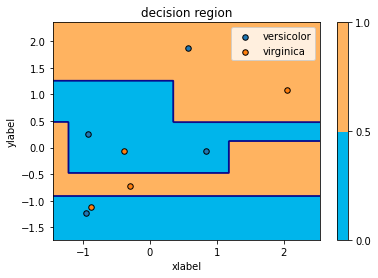

In [ ]:
decision_region(X_set3_val, y_set3_val, scratch_dt_model);

**Decision area of scikit-learn version**

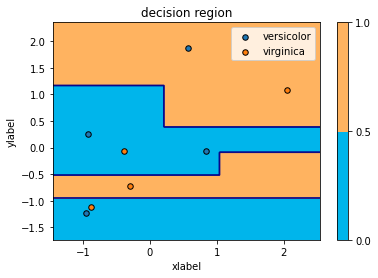

In [ ]:
decision_region(X_set3_val, y_set3_val, clf);